In [1]:
import plotly

from src.dataviz import DatabasePlots

In [2]:
db_plots = DatabasePlots()

In [3]:
db_plots.df.CENTRE_POINTS.head(5)

,node,node_verbose,country,region,subregion,geometry
0,AFG-XX,Afghanistan,Afghanistan,Asia,Southern Asia,POINT (66.03059 33.82888)
1,AGO-XX,Angola,Angola,Africa,Sub-Saharan Africa,POINT (17.57616 -12.33727)
2,ALB-XX,Albania,Albania,Europe,Southern Europe,POINT (20.06196 41.14084)
3,ARE-XX,United Arab Emirates,United Arab Emirates,Asia,Western Asia,POINT (54.33630 23.90734)
4,ARG-XX,Argentina,Argentina,Americas,Latin America and the Caribbean,POINT (-65.14102 -35.18534)


In [4]:
db_plots.df.DATABASE.head(5)

,from,to,existing capacity + (mw),existing capacity - (mw),planned capacity + (mw),planned capacity - (mw),year planned,assumptions/applied methods,other notes,source existing (2023),source planned
0,AFG-XX,CHN-XI,0.0,0.0,0.0,0.0,NaN,NaN,Afghanistan had joined China's Belt and Road i...,https://iea.blob.core.windows.net/assets/b066e...,https://www.reuters.com/world/asia-pacific/tal...
1,AFG-XX,IRN-XX,175.0,-175.0,325.0,-325.0,NaN,It's reported that as of 2022 trade potential ...,NaN,https://www.tehrantimes.com/news/468852/Iran-e...,https://www.tehrantimes.com/news/468852/Iran-e...
2,AFG-XX,PAK-XX,0.0,0.0,0.0,0.0,NaN,Following the specifics of the CASA-1000 proje...,NaN,https://iea.blob.core.windows.net/assets/b066e...,https://iea.blob.core.windows.net/assets/b066e...
3,AFG-XX,TKM-XX,0.0,-400.0,1000.0,-1000.0,NaN,NaN,Currently a trade agreement of 400 MW for unil...,https://iea.blob.core.windows.net/assets/b066e...,https://pajhwok.com/2023/01/29/power-supply-pr...
4,ARE-XX,IND-WE,0.0,0.0,0.0,0.0,NaN,NaN,"No capacity as of yet, but a subsea transmissi...",https://openinframap.org/#4.16/20.3/63.43,https://www.siasat.com/india-planning-power-gr...


In [5]:
fig = db_plots.map_excluded_regions(
    showgrid=False,
    colours={
        'Included' : '#d3e6d4', 
        'Excluded' : '#f0a3af'
    },    
)

# legend loc
fig.update_layout(
    title_text='<b>a)</b>', 
    titlefont=dict(size=22),
    title_x=0.02, 
    title_y=0.95,
    legend=dict(
        yanchor="top",
        y=0.6,
        xanchor="left",
        x=0.05,
        orientation="v",
    )
)


fig.write_html('../outputs/figures/map_excluded_regions.html')
plotly.io.write_image(fig, '../outputs/figures/map_excluded_regions.pdf', format='pdf')
plotly.io.write_image(fig, '../outputs/figures/map_excluded_regions.pdf', format='pdf')

fig.show()

In [6]:
# fig = db_plots.spatial_representation()

# # legend loc
# fig.update_layout(
#     title_text='<b>b)</b>', 
#     titlefont=dict(size=22),
#     title_x=0.02, 
#     title_y=0.95,
#     legend=dict(
#         yanchor="top",
#         y=0.6,
#         xanchor="left",
#         x=0.05,
#         orientation="v",
#     )
# )

# fig.write_html('../outputs/figures/spatial_representation.html')
# plotly.io.write_image(fig, '../outputs/figures/spatial_representation.pdf', format='pdf')
# plotly.io.write_image(fig, '../outputs/figures/spatial_representation.pdf', format='pdf')

# fig.show()

# #fig.savefig("../outputs/figures/spatial-representation.png", dpi=400)

In [7]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity = True,
    node_size = 4,
    colours = {
        'node' : 'teal',
        'landcolor' : 'oldlace',
        'borders' : 'lightgray',
        'oceancolor' : 'white',
        'line_existing' : 'lightcoral',
        'line_planned' : 'navy',
    },
    line_min_width = 1,
    line_step = 1.0,
    showgrid = False,
    title = '<b>b)</b>',
    legend_title = None,
)

# formatting
fig.update_layout(
    title=dict(
        font=dict(size=24)
    ),
    title_x=0.1,
    title_y=0.9,
    legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="center",
        x=0.5,
        orientation="h",
    ),
)

fig.write_html('../outputs/figures/map_capacity_planned.html')
plotly.io.write_image(fig, '../outputs/figures/map_capacity_planned.pdf', format='pdf')

fig.show()

In [8]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity = False,
    node_size = 4,
    colours = {
        'node' : 'teal',
        'landcolor' : 'oldlace',
        'borders' : 'lightgray',
        'oceancolor' : 'white',
        'line_existing' : 'lightcoral',
        'line_planned' : 'navy',
    },
    line_min_width = 1,
    line_step = 1.0,
    showgrid = False,
    title = '<b>a)</b>',
    legend_title = None,
)

# formatting
fig.update_layout(
    title=dict(
        font=dict(size=24)
    ),
    title_x=0.1,
    title_y=0.9,
    legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="center",
        x=0.5,
        orientation="h",
    ),
)

fig.write_html('../outputs/figures/map_capacity_existing.html')
plotly.io.write_image(fig, '../outputs/figures/map_capacity_existing.pdf', format='pdf')

fig.show()

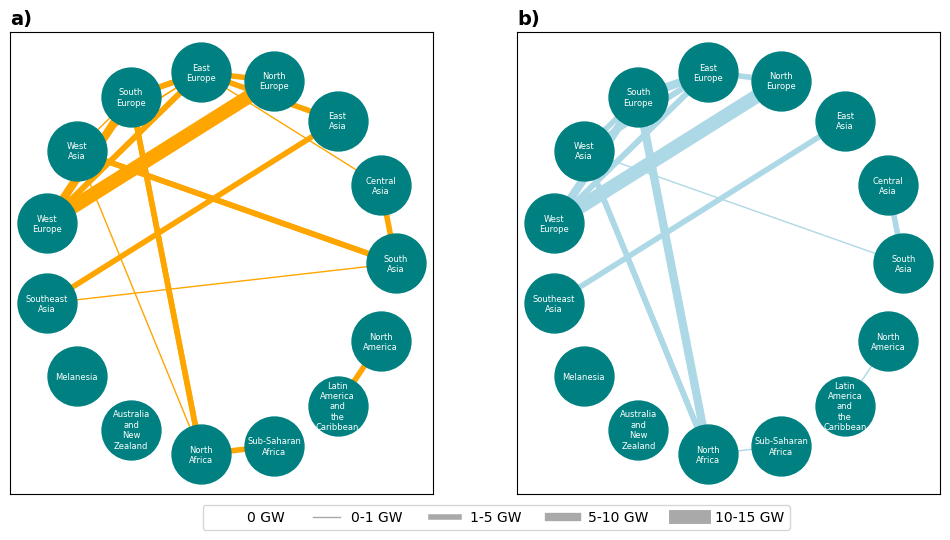

In [10]:
f = db_plots.network_topology(
    by='subregion',
    node_size=1800,
    figsize = (12,6)
)

f.savefig(
    fname = '../outputs/figures/nx_network_topology.pdf',
    bbox_inches = 'tight',
)

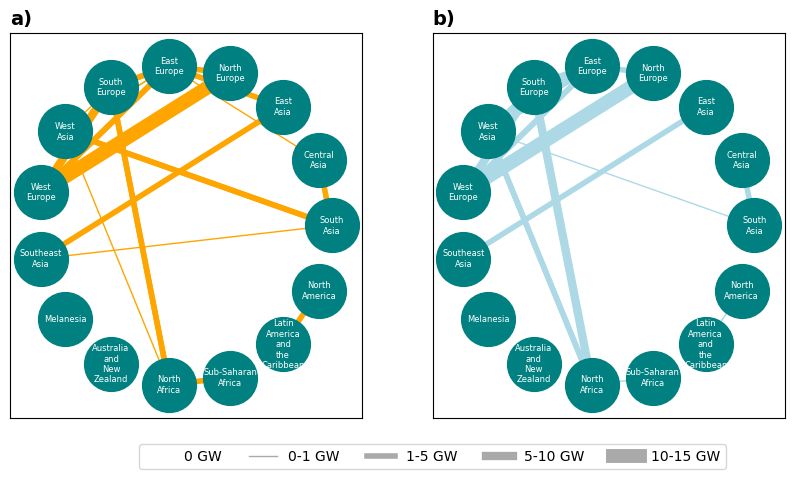

In [10]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

by = 'subregion'
figsize = (10,5)
jitter = 1
colours = {'planned' : 'lightblue', 'existing' : 'orange'}
font_size=3,
font_color='white'
node_size=1500,
#figsize=(8,8)
legend_scale=1

df = db_plots.df.get_interregional_capacity(by=by).reset_index().copy()

# rename columns
renaming = {
    'Northern' : 'North',
    'Eastern' : 'East',
    'South-eastern' : 'Southeast',
    'Southern' : 'South',
    'Western' : 'West',
}

for k in renaming.keys():
    df['from'] = df['from'].str.replace(k, renaming[k])
    df['to'] = df['to'].str.replace(k, renaming[k])

# change from/to for labels
df['from'] = df['from'].str.replace(' ','\n')
df['to'] = df['to'].str.replace(' ','\n')

# add source/target
df['source'] = df['from']
df['target'] = df['to']

# add existing to planned
#df['planned'] = df['existing'] + df['planned']

# sort
df = df.sort_values(by='target')

# categorise edges
bins = [0,0.0001,1,5,10,15]
labels = ['0','0-1','1-5','5-10','10-15']
widths = [0,1,4,6,10]

# bin capacities
def bin_capacities(df,series):

    df[f'{series}_bin'] = pd.cut(
        df[series].divide(1e3), 
        bins=bins, 
        labels=labels,
        right=False,
    )

    for i, bin in enumerate(labels):
        df.loc[ df[f'{series}_bin'] == bin, f'{series}_width' ] = widths[i]
    
    return df

df = bin_capacities(df,series='existing')
df = bin_capacities(df,series='planned')


G = nx.from_pandas_edgelist(
    df,
    edge_attr=["existing_width", "planned_width"],
    create_using=nx.MultiGraph(),
)

# init figure
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=figsize,
) 

# positions
pos = nx.circular_layout(G)
nx.set_node_attributes(G, pos, 'pos')

# nodes
for i in [0,1]:

    # draw nodes
    nx.draw_networkx_nodes(
        G, 
        pos, 
        node_size=node_size,
        node_color='teal',
        alpha=1,
        ax=ax[i],
    )

    # node labels
    nodelist = G.nodes()

    nx.draw_networkx_labels(
        G, 
        pos,
        labels=dict(zip(nodelist,nodelist)),
        font_color=font_color,
        font_size=6,
        ax=ax[i],
    )

# edges (existing)
edgewidth = [ d['existing_width'] for (u,v,d) in G.edges(data=True)]

nx.draw_networkx_edges(
    G, 
    pos, 
    width=edgewidth,
    edge_color=colours['existing'],
    alpha=1,
    ax=ax[0],
)

# edges (planned)
edgewidth = [ d['planned_width'] for (u,v,d) in G.edges(data=True)]

nx.draw_networkx_edges(
    G, 
    pos, 
    width=edgewidth,
    edge_color=colours['planned'],
    alpha=1,
    ax=ax[1],
)

# formatting
ax[0].set_title(
    'a)',
    fontsize=14,
    fontweight='bold',
    loc='left',
)

ax[1].set_title(
    'b)',
    fontsize=14,
    fontweight='bold',
    loc='left',
)

# legend
legend_elements = []

legend_labels = {}
for i, w in enumerate(widths):
    legend_labels[w] = labels[i]

for i, width in enumerate(widths):
    legend_elements.append(
        Line2D(
            [0], 
            [0], 
            color='darkgray', 
            lw=width, 
            label=f'{legend_labels[width]} GW')
    )

plt.legend(
    handles=legend_elements, 
    loc='center', 
    prop={
        'size': 10
    }, 
    frameon=True,
    ncol=10,
    bbox_to_anchor=(0, -0.1),
)

# frame
#plt.box(False)

In [11]:
df

,from,to,existing,planned,source,target,existing_bin,existing_width,planned_bin,planned_width
20,South\nAsia,Central\nAsia,1580.0,2800.0,South\nAsia,Central\nAsia,1-5,4.0,1-5,4.0
3,East\nAsia,Central\nAsia,0.0,0.0,East\nAsia,Central\nAsia,0,0.0,0,0.0
21,South\nAsia,East\nAsia,0.0,0.0,South\nAsia,East\nAsia,0,0.0,0,0.0
17,North\nEurope,East\nEurope,0.0,1500.0,North\nEurope,East\nEurope,0,0.0,1-5,4.0
24,South\nEurope,East\nEurope,1700.0,0.0,South\nEurope,East\nEurope,1-5,4.0,0,0.0
30,West\nAsia,East\nEurope,950.0,1000.0,West\nAsia,East\nEurope,0-1,1.0,1-5,4.0
4,East\nAsia,East\nEurope,1295.0,0.0,East\nAsia,East\nEurope,1-5,4.0,0,0.0
2,Central\nAsia,East\nEurope,350.0,0.0,Central\nAsia,East\nEurope,0-1,1.0,0,0.0
34,West\nEurope,East\nEurope,2700.0,2900.0,West\nEurope,East\nEurope,1-5,4.0,1-5,4.0
19,Southeast\nAsia,Melanesia,0.0,0.0,Southeast\nAsia,Melanesia,0,0.0,0,0.0


In [12]:
df[f'{series}_bin'].unique()

NameError: name 'series' is not defined

In [ ]:
df